# Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [1]:
import os
import pandas as pd
from botocore.client import Config
import ibm_boto3
import io
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to load the pickle file from IBM COS
def load_pickle_from_cos(bucket, key, client):
    # Get the object from the bucket
    response = client.get_object(Bucket=bucket, Key=key)
    
    # Read the object content
    object_content = response['Body'].read()
    
    # Load the pickle file into a DataFrame
    df = pd.read_pickle(io.BytesIO(object_content))
    return df

# Initialize the COS client
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='MjJB2foti-ACb0aum6tpr_MABhlskLbgK4djDXeXLltL',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'task410-donotdelete-pr-fck0m7flgp8x29'
object_key = 'task4.9_part1.pkl'

# Load the DataFrame
df = load_pickle_from_cos(bucket, object_key, cos_client)

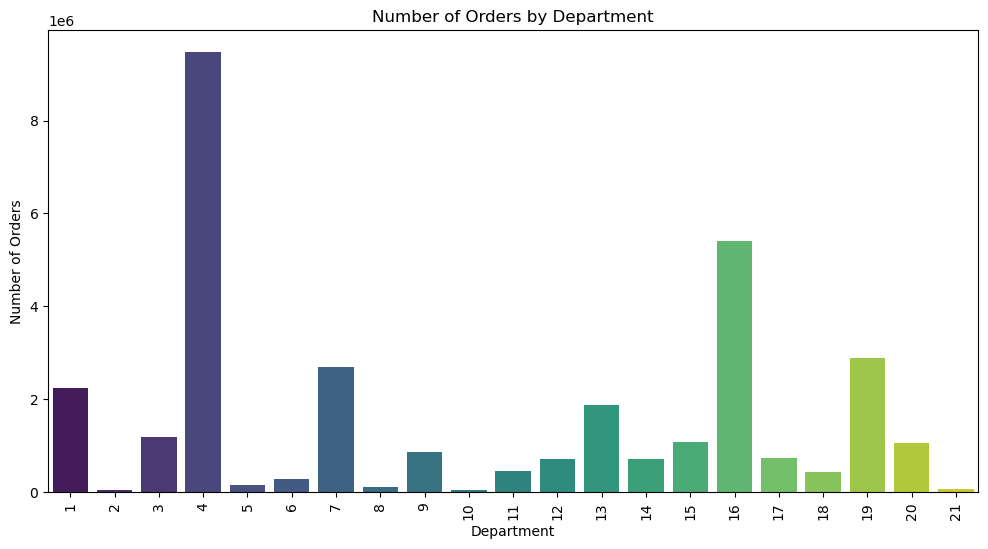

In [3]:
# Group by department_id and count the number of orders
department_orders = df.groupby('department_id')['order_id'].count().reset_index()

# Sort the values by number of orders in descending order
department_orders = department_orders.sort_values(by='order_id', ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x='department_id', y='order_id', data=department_orders, palette='viridis')
plt.title('Number of Orders by Department')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()

### Question 4: Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

Based on the bar plot showing the number of orders by department, it is evident that certain departments have significantly higher frequencies of product orders. The departments with the highest number of orders are:

- **Department 4**: This department has the highest number of orders, indicating that products in this category are extremely popular among customers.
- **Department 16**: This department also shows a high number of orders, making it another popular category.
- **Department 7**: With a substantial number of orders, this department is also among the most frequented by customers.

Other departments with notable order frequencies include departments 1, 8, and 19.

Understanding these trends can help the marketing and sales teams focus their efforts on promoting and advertising products from these high-frequency departments to maximize their impact.
